# Week VIII: NLP Part 2 - Text Generation

Today we're going to cover NLP text generation. We'll train RNN models (GRU) on books in order to create whole new texts.

We'll train our models on two different datasets and see how it affects their style.

## First dataset: War and Peace

For our first example, we'll train an RNN model on the book War and Peace by Leo Tolstoy. Old books are often in public domain, we it's easy to obtain them. The datasets in this notebook were taken from [Project Gutenberg](https://www.gutenberg.org/).

As usual, let's mount Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

We're going to read the book from a .txt file:

In [ ]:
raw_text = open('/content/drive/My Drive/war_and_peace.txt', 'r', encoding='utf-8').read()

In [ ]:
len(raw_text)

3227519

As we can see, the book begins with a preamble:

In [ ]:
raw_text[:1000]

'The Project Gutenberg eBook of War and Peace, by Leo Tolstoy\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: War and Peace\n\nAuthor: Leo Tolstoy\n\nTranslators: Louise and Aylmer Maude\n\nRelease Date: April, 2001 [eBook #2600]\n[Most recently updated: January 21, 2019]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: An Anonymous Volunteer and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***\n\n\n\n\nWAR AND PEACE\n\n\nBy Leo Tolstoy/Tolstoi\n\n\n    Contents\n\n    BOOK ONE: 1805\n\n    CHAPTER I\n\n    CHAPTER II\n\n    CHAPTER 

And ends with a legal notice:

In [ ]:
raw_text[-18000:]

'\nroyalties. Special rules, set forth in the General Terms of Use part\nof this license, apply to copying and distributing Project\nGutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm\nconcept and trademark. Project Gutenberg is a registered trademark,\nand may not be used if you charge for an eBook, except by following\nthe terms of the trademark license, including paying royalties for use\nof the Project Gutenberg trademark. If you do not charge anything for\ncopies of this eBook, complying with the trademark license is very\neasy. You may use this eBook for nearly any purpose such as creation\nof derivative works, reports, performances and research. Project\nGutenberg eBooks may be modified and printed and given away--you may\ndo practically ANYTHING in the United States with eBooks not protected\nby U.S. copyright law. Redistribution is subject to the trademark\nlicense, especially commercial redistribution.\n\nSTART: FULL LICENSE\n\nTHE FULL PROJECT GUTENBERG LICENS

These two parts are of no iterest to us.

We'll skip to the actual book by looking for its famous opening line:

In [ ]:
book_start = raw_text.find('Well, Prince, so Genoa and Lucca')
book_start

7488

And the book ends with its legal license which does not interest us. We'll find its beginning 

In [ ]:
book_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***')
book_end

3209114

Let's keep only the book itself:

In [ ]:
book = raw_text[book_start:book_end]

In [ ]:
book[:1000]

'Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don’t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by that\nAntichrist—I really believe he is Antichrist—I will have nothing\nmore to do with you and you are no longer my friend, no longer my\n‘faithful slave,’ as you call yourself! But how do you do? I see I\nhave frightened you—sit down and tell me all the news.”\n\nIt was in July, 1805, and the speaker was the well-known Anna Pávlovna\nSchérer, maid of honor and favorite of the Empress Márya Fëdorovna.\nWith these words she greeted Prince Vasíli Kurágin, a man of high\nrank and importance, who was the first to arrive at her reception. Anna\nPávlovna had had a cough for some days. She was, as she said, suffering\nfrom la grippe; grippe being then a new word in St. Petersburg, used\nonly by the elite.\n\nAll her invitations without exception, written in French, and delivered\nby a s

And replace new line characters with spaces:

In [ ]:
book = book.replace("\n", " ")
book[:1000]

'Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don’t tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist—I really believe he is Antichrist—I will have nothing more to do with you and you are no longer my friend, no longer my ‘faithful slave,’ as you call yourself! But how do you do? I see I have frightened you—sit down and tell me all the news.”  It was in July, 1805, and the speaker was the well-known Anna Pávlovna Schérer, maid of honor and favorite of the Empress Márya Fëdorovna. With these words she greeted Prince Vasíli Kurágin, a man of high rank and importance, who was the first to arrive at her reception. Anna Pávlovna had had a cough for some days. She was, as she said, suffering from la grippe; grippe being then a new word in St. Petersburg, used only by the elite.  All her invitations without exception, written in French, and delivered by a scarlet-liveried f

### Creating a dataset

We'll be using Tensorflow Datasets in order to improve efficiency.

Let's create our vocabulary. This time we're going to make character-level predictions so the vocabulary is going to be composed of characters and not words:

In [ ]:
vocab = sorted(set(book))
vocab

[' ',
 '!',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'À',
 'Á',
 'É',
 'à',
 'á',
 'â',
 'ä',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'í',
 'î',
 'ï',
 'ó',
 'ô',
 'ö',
 'ú',
 'ü',
 'ý',
 'œ',
 '—',
 '‘',
 '’',
 '“',
 '”']

We'll use a preprocessing layer which maps string features to integer indices on the vocabulary:

In [ ]:
import tensorflow as tf
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)

Notice it's case sensitive:

In [ ]:
ids_from_chars(['A', 'a'])

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([24, 50])>

And the other way around:

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
chars_from_ids([24, 50])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'A', b'a'], dtype=object)>

Now let's convert the entire book to a character-level tensor:

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(book, 'UTF-8'))
all_ids

<tf.Tensor: shape=(3201626,), dtype=int64, numpy=array([46, 54, 61, ...,  1,  1,  1])>

Now we can convert it to a tf Dataset:

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

And view the results:

In [ ]:
for ids in ids_dataset.take(12):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

W
e
l
l
,
 
P
r
i
n
c
e


### Defining the problem

Given a starting series of characters, we want to generate more characters according to some learned logic.

In this case, we'll use sequences of 100 charcters:

In [ ]:
seq_length = 100
examples_per_epoch = len(book)//(seq_length+1)

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))  
  print([n.decode('utf-8') for n in chars_from_ids(seq).numpy()])

tf.Tensor(
[b'W' b'e' b'l' b'l' b',' b' ' b'P' b'r' b'i' b'n' b'c' b'e' b',' b' '
 b's' b'o' b' ' b'G' b'e' b'n' b'o' b'a' b' ' b'a' b'n' b'd' b' ' b'L'
 b'u' b'c' b'c' b'a' b' ' b'a' b'r' b'e' b' ' b'n' b'o' b'w' b' ' b'j'
 b'u' b's' b't' b' ' b'f' b'a' b'm' b'i' b'l' b'y' b' ' b'e' b's' b't'
 b'a' b't' b'e' b's' b' ' b'o' b'f' b' ' b't' b'h' b'e' b' ' b'B' b'u'
 b'o' b'n' b'a' b'p' b'a' b'r' b't' b'e' b's' b'.' b' ' b'B' b'u' b't'
 b' ' b'I' b' ' b'w' b'a' b'r' b'n' b' ' b'y' b'o' b'u' b',' b' ' b'i'
 b'f' b' ' b'y'], shape=(101,), dtype=string)
['W', 'e', 'l', 'l', ',', ' ', 'P', 'r', 'i', 'n', 'c', 'e', ',', ' ', 's', 'o', ' ', 'G', 'e', 'n', 'o', 'a', ' ', 'a', 'n', 'd', ' ', 'L', 'u', 'c', 'c', 'a', ' ', 'a', 'r', 'e', ' ', 'n', 'o', 'w', ' ', 'j', 'u', 's', 't', ' ', 'f', 'a', 'm', 'i', 'l', 'y', ' ', 'e', 's', 't', 'a', 't', 'e', 's', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'B', 'u', 'o', 'n', 'a', 'p', 'a', 'r', 't', 'e', 's', '.', ' ', 'B', 'u', 't', ' ', 'I', ' ', 'w', 'a', 

And now we can define the labels. Let's look at an example using this auxiliary fucntion:

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
split_input_target('12345')

('1234', '2345')

In this example, we're mapping '1234' -> '2345'. Similarily, we do the same things for the 101-length sequences we created earlier. We now apply it to the whole dataset using 'map':

In [ ]:
dataset = sequences.map(split_input_target)

Now we join the single charcters into strings again:

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

Let's test this function:

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if '
Target: b'ell, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if y'


Apply on entire dataset:

In [ ]:
# Taken directly from TF guide

# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

And now we can move on and use this dataset.

### Build model

We're going to begin by using embeddings with a GRU layer.

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)
vocab_size

103

In [ ]:
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

Let's recall what LSTM and GRU are:

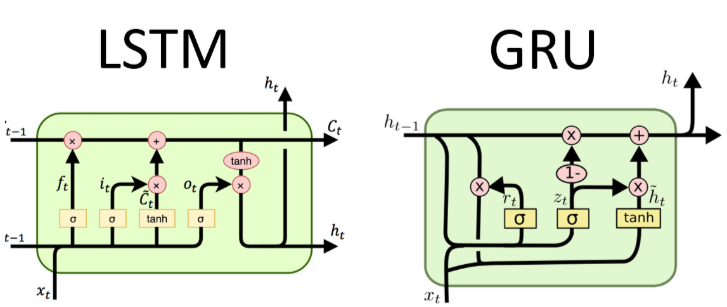

LSTM has 3 gates: forget, input, and output.

GRU has only two gates: reset and update.

Consequently, GRUs are faster.

We'll create a special class for this model. It inherits from tf.keras.Model.

In [ ]:
class GRUModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

Build the model instance:

In [ ]:
war_and_peace_gru_model = GRUModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

Use it on some random data without training:

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = war_and_peace_gru_model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 104) # (batch_size, sequence_length, vocab_size)


In [ ]:
war_and_peace_gru_model.summary()

Model: "gru_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  26624     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  106600    
                                                                 
Total params: 4,071,528
Trainable params: 4,071,528
Non-trainable params: 0
_________________________________________________________________


Take one random example:

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([ 37,  61,  34,  79,  59,  10,  90,  68,  15,  32,  26, 100,  17,
        51,  82,  52,  88,  96,  74,  92,  21,  20,  29, 100,  31,  32,
        44,  66,   4,  76,  17,  54,  76,  64,  27,  40,   4,  76,  38,
        89,  22,  68,  66,  64,  61,  84, 100,   1,  34,  16,  44,  98,
        45,  50,  48,  17,  57,  78,  94,  64,  27,  63,  65,  18,  81,
        54,  55,   9,  46,  49,  37,  35,  32,  82,   3,  47,  65,  63,
        77,  56,  84,  56,  27,  71,  62,  85,  38,   6,  62,  63,  26,
        83,   9,  61,  32,   6,  69,  74,  34,  66])

And test the model:

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy().decode('utf-8'))
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy().decode('utf-8'))

Input:
 utúzov smiled in a way that seemed to say, “You are quite at liberty not to believe me and I don’t e

Next Char Predictions:
 NlKàj0îs5IC‘7bäcëüyó;:F‘HIUq)À7eÀoDQ)ÀOí=sqolç‘ K6UœVaY7hÉöoDnp8âef/WZNLIä(XpnÁgçgDvmèO,mnCæ/lI,tyKq


This is terrible! The model is outputing pure gibberish.

### Train model

Compile the model using sparse nll which gives us the most likely character as pur prediction:

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

sparse_nll = SparseCategoricalCrossentropy(from_logits=True)
war_and_peace_gru_model.compile(optimizer='adam', loss=sparse_nll)

Note that we used 'from_logits=True'. This is because we didn't use any probabilistic activation on our output layer.

Let's create a ModelCheckpoint instance. This time we're using a sub-classe model, we Keras can't save it. Instead, we can save just its weights. We're going to save them directly to Google Drive:

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint


def create_checkpoint(model_name, epochs):
  checkpoint_dir = os.path.join('/content/drive/My Drive/nlp_checkpoints', model_name)
  checkpoint_prefix = os.path.join(checkpoint_dir, str(epochs) + "_epochs", str(epochs) + "_epochs_cp.ckpt")

  checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_prefix,
      save_weights_only=True,
      save_best_only=True,
      monitor='val_loss',
      mode='min',
      verbose=1)
  return checkpoint_callback, checkpoint_prefix

Set the number of epochs:

In [ ]:
EPOCHS = 5

Train-val split:

In [ ]:
len(dataset)

495

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = int(0.2 * len(dataset))

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [ ]:
len(train_dataset), len(val_dataset)

(396, 99)

Set model name:

In [ ]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('war_and_peace_gru', EPOCHS)

Only train model if weights don't exist:

In [ ]:
checkpoint_prefix

'/content/drive/My Drive/nlp_checkpoints/war_and_peace_gru/5_epochs/5_epochs_cp.ckpt'

In [ ]:
os.path.dirname(checkpoint_prefix)

'/content/drive/My Drive/nlp_checkpoints/war_and_peace_gru/5_epochs'

In [ ]:
os.path.exists(os.path.dirname(checkpoint_prefix))

True

Train model/load weights:

In [ ]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  war_and_peace_gru_model.load_weights(checkpoint_prefix)
else:
  war_and_peace_gru_model.fit(train_dataset, 
                              validation_data=val_dataset, 
                              epochs=EPOCHS,
                              callbacks=[checkpoint_callback])

### Multiple step vs. single step predictions

In [ ]:
# Taken directly from TF guide

class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

Define one step model:

In [ ]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars)

Let's build a function to test it for 1,000 future characters:

In [ ]:
from tqdm.notebook import tqdm as notebook_tqdm


def predict_multiple_steps(start_string, one_step_model):
  states = None
  next_char = tf.constant([start_string])
  result = [next_char]

  for n in notebook_tqdm(range(1000)):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

  result = tf.strings.join(result)
  return result

In [ ]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(result[0].numpy().decode('utf-8'))

The answer to that question he was commanding in their forcess shives the plandon because in A brilliant center’s leather a probability of enveying a pitied in the rank over her curiosity or dispositively pacced to Smolénsk and travit the last power in which she read to see him.  Pierre approaches all right, he was so badly in marriage but on the regiment from Moscow dear man in the porch. Next days were not even go I rangives ill and what I am a woman. How vowishes are coming furily and done, put I mustn’t worn out all.       * 3) only the inhabitantsians fellow mingledve aloodes in Kue Kurágin is, and the younge, man was since down on by counting it is,” said Nicholas to “Consign or laugh. It happen then,” said Dólokhov, but now that what her thousand men having finished her agitated and executed, somewith the important and more, but ridgen by a hundred and troops abone, as interrupted his ather to punn her.  “Yes, a fine army defficulties genius to that Your Majesty Kutúzovs’ though

And here after only 5 epochs we see a fascinating results. Our model seems to have learned a few interesting linguistical concepts:



*   Punctuation: we see that commas and full stops are used somewhat correctly.
*   Capitalization: persons/names are capitalized.

On the other hand, 
*   Grammar: the grammar is a bit broken.
*   Spelling: many words are not real existent words. 
*   Meaning: the sentence is completely nonsensical.




Let's try for a few more epochs:

In [ ]:
EPOCHS = 40

In [ ]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('war_and_peace_gru', EPOCHS)

In [ ]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  war_and_peace_gru_model.load_weights(checkpoint_prefix)
else:
  war_and_peace_gru_model.fit(train_dataset, 
                              validation_data=val_dataset, 
                              epochs=EPOCHS,
                              callbacks=[checkpoint_callback])

In [ ]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars)

Repeat the exact same sentence:

In [ ]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(result[0].numpy().decode('utf-8'))

The answer to that question to have to accept the problem of the Emperor and those devisions were in our army, the affair has afraid of ever detain historical persons is an orware for man to destroy him. He kept askin that the war not only begins to undertion between the Grand of Schlappanitz whether Davout scrubbed everything here was judging from this strange, but no one nearer to us before that is, to prevent against the campaign of St. Georth or regeneration and possessor of his jerky step; and the married man can see what he had fallen so pleasure in the aggrastet the Emperor’s dislivers learned of many balls and altered in Denísov’s words.  “Mitty way, and what all uprischips here at steady?”  “No, Papa, please do!”  “Really’ grant pleasure at statues, or enchanting, and by monay!”  And the Emperor had faxily become study.  “Uncle” lid them de Congraux but despise and glancing back along the moral illumination of the whole campaign of Schlapsa great things about were the prince i

This time we see slightly different results.

*   Capitalization: persons/names are capitalized, as well as initial letters after a full stop.
*   Grammar: still broken, but imrpoved a bit.
*   Spelling: this time most of the words are not real existent words. 
*   Meaning: still no complete inderstandable meaning*.

*This is a known concept in linguistics. See [Colorless green ideas sleep furiously
](https://en.wikipedia.org/wiki/Colorless_green_ideas_sleep_furiously#:~:text=Colorless%20green%20ideas%20sleep%20furiously%20is%20a%20sentence%20composed%20by,%2Dformed%2C%20but%20semantically%20nonsensical.).



We can also try and experiment a bit with the temperature parameter:

In [ ]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars, temperature=0.5)
result = predict_multiple_steps('The answer to that question ', one_step_model)
print(result[0].numpy().decode('utf-8'))

  0%|          | 0/1000 [00:00<?, ?it/s]

The answer to that question he would not see the Emperor’s necessity) which thoughts of the presence of the men who had stooped from her) to him become in his wife’s proposals and his own desires. Melturable and common talk with his father had been at the first house on the table where Natásha was lifted in the midst of a connection of the morning still more because he was always contradictory gesture, and so forth in the morning, the countess wakes its lifeless and all that had happened suddenly became terribly to the serfs’ quarters. The army said that he had formerly been to the enemy unconcerned only about the ancients the greater the will of the people who suggested to him about him. He understood what this little Nicholas had sent him to the guests, and the army services were concealed the result of the army and the backs of the icons whom they had been also sit by into the drawing room.  “What does that man a thing and no farther to him. What do you want; then I was in love with

In [ ]:
one_step_model = OneStep(war_and_peace_gru_model, chars_from_ids, ids_from_chars, temperature=0.1)
result = predict_multiple_steps('The answer to that question ', one_step_model)
print(result[0].numpy().decode('utf-8'))

  0%|          | 0/1000 [00:00<?, ?it/s]

The answer to that question he was standing in the midst of a dozen men, who was always defined by the thought of the fact that the season they all remembered the Emperor’s dislike of Kutúzov, and his own plan, which were being present at the battle of Borodinó to the laws of reason.  The countess was sitting in the same classing gave him her hand and kissed her hand and kissed her hand and kissed her hand.  “I have not yet seen on the contrary, that’s what I was a fool!” said Pierre, “and he is so ill. When you are myself,” said the countess with a smile.  “Who are they? They’re forgiveness!”  “Well, what is it? So each of these young people said that the man who wish to be at home?” he asked.  “He has lost me to do it!’ ‘I say they will be my friends with my mother!” shouted a Cossack coat, and she was silent, and she was saying, but could not reply.  “Why are you going to spend the commander in chief in Moscow?” and he was silent.  “I will tell you like that, you can still be the wh

## Retrain on Iliad

Let's move to a different, perhaps more difficult example. This time, we'll train the model on the Iliad by Homer. Its difficulty stems from 3 factors:


*   Smaller dataset
*   Larger vocabulary (Greek characters)
*   Poetry format


Let's repeat the whole process:

### Build dataset

In [ ]:
iliad = open('/content/drive/My Drive/iliad.txt', 'r', encoding='utf-8').read()

This time the book begins with three long introductions which are not in the style of the Iliad. Let's skip to the poetry section:

In [ ]:
iliad_start = iliad.find('In the war of Troy')
iliad_start

117695

In [ ]:
iliad_end = raw_text.find('*** END OF THE PROJECT GUTENBERG EBOOK WAR AND PEACE ***')
iliad_end

3209114

In [ ]:
iliad_book = iliad[iliad_start:iliad_end]

This time, due to the poetry format we're going to keep the newline characters. Let's use pretty print to view it correctly:

In [ ]:
from pprint import pprint
pprint(iliad_book[:1000])

('In the war of Troy, the Greeks having sacked some of the neighbouring\n'
 'towns, and taken from thence two beautiful captives, Chryseïs and\n'
 'Briseïs, allotted the first to Agamemnon, and the last to Achilles.\n'
 'Chryses, the father of Chryseïs, and priest of Apollo, comes to the\n'
 'Grecian camp to ransom her; with which the action of the poem opens, in\n'
 'the tenth year of the siege. The priest being refused, and insolently\n'
 'dismissed by Agamemnon, entreats for vengeance from his god; who\n'
 'inflicts a pestilence on the Greeks. Achilles calls a council, and\n'
 'encourages Chalcas to declare the cause of it; who attributes it to the\n'
 'refusal of Chryseïs. The king, being obliged to send back his captive,\n'
 'enters into a furious contest with Achilles, which Nestor pacifies;\n'
 'however, as he had the absolute command of the army, he seizes on\n'
 'Briseïs in revenge. Achilles in discontent withdraws himself and his\n'
 'forces from the rest of the Greeks; and c

In [ ]:
pprint(iliad_book[2000:3000])

('on a dire contagion spread,[44]\n'
 'And heap’d the camp with mountains of the dead;\n'
 'The king of men his reverent priest defied,[45]\n'
 'And for the king’s offence the people died.\n'
 '\n'
 'For Chryses sought with costly gifts to gain\n'
 'His captive daughter from the victor’s chain.\n'
 'Suppliant the venerable father stands;\n'
 'Apollo’s awful ensigns grace his hands:\n'
 'By these he begs; and lowly bending down,\n'
 'Extends the sceptre and the laurel crown.\n'
 'He sued to all, but chief implored for grace\n'
 'The brother-kings, of Atreus’ royal race[46]\n'
 '\n'
 '“Ye kings and warriors! may your vows be crown’d,\n'
 'And Troy’s proud walls lie level with the ground.\n'
 'May Jove restore you when your toils are o’er\n'
 'Safe to the pleasures of your native shore.\n'
 'But, oh! relieve a wretched parent’s pain,\n'
 'And give Chryseïs to these arms again;\n'
 'If mercy fail, yet let my presents move,\n'
 'And dread avenging Phœbus, son of Jove.”\n'
 '\n'
 'The Greeks

Remove all brackets (references and explanations):

In [ ]:
import re
iliad_book = re.sub('\[[^]]*\]', '', iliad_book)

And verify they're gone:

In [ ]:
pprint(iliad_book[2000:3000])

('ntagion spread,\n'
 'And heap’d the camp with mountains of the dead;\n'
 'The king of men his reverent priest defied,\n'
 'And for the king’s offence the people died.\n'
 '\n'
 'For Chryses sought with costly gifts to gain\n'
 'His captive daughter from the victor’s chain.\n'
 'Suppliant the venerable father stands;\n'
 'Apollo’s awful ensigns grace his hands:\n'
 'By these he begs; and lowly bending down,\n'
 'Extends the sceptre and the laurel crown.\n'
 'He sued to all, but chief implored for grace\n'
 'The brother-kings, of Atreus’ royal race\n'
 '\n'
 '“Ye kings and warriors! may your vows be crown’d,\n'
 'And Troy’s proud walls lie level with the ground.\n'
 'May Jove restore you when your toils are o’er\n'
 'Safe to the pleasures of your native shore.\n'
 'But, oh! relieve a wretched parent’s pain,\n'
 'And give Chryseïs to these arms again;\n'
 'If mercy fail, yet let my presents move,\n'
 'And dread avenging Phœbus, son of Jove.”\n'
 '\n'
 'The Greeks in shouts their joint a

In [ ]:
iliad_vocab = sorted(set(iliad_book))
iliad_vocab

['\n',
 ' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '§',
 'Æ',
 'à',
 'ä',
 'æ',
 'è',
 'é',
 'ë',
 'ï',
 'ò',
 'ù',
 'ü',
 'Œ',
 'œ',
 'Δ',
 'Ε',
 'Θ',
 'Κ',
 'Μ',
 'Ο',
 'α',
 'γ',
 'δ',
 'ε',
 'η',
 'θ',
 'ι',
 'κ',
 'λ',
 'μ',
 'ν',
 'ξ',
 'ο',
 'π',
 'ρ',
 'ς',
 'σ',
 'τ',
 'υ',
 'φ',
 'χ',
 'ω',
 'ἀ',
 'ἂ',
 'ἐ',
 'ἑ',
 'ἕ',
 'ἡ',
 'ἤ',
 'ἦ',
 'ἰ',
 'ἱ',
 'ἷ',
 'ὁ',
 'ὅ',
 'Ὀ',
 'Ὁ',
 'Ὅ',
 'ὐ',
 'ὔ',
 'Ὡ',
 'ὰ',
 'ά',
 'ὲ',
 'έ',
 'ὴ',
 'ή',
 'ὶ',
 'ί',
 'ὸ',
 'ό',
 'ὺ',
 'ύ',
 'ώ',
 'ᾳ',
 'ῆ',
 'ῇ',
 'ῖ',
 'ῦ',
 'ῳ',
 'ῶ',
 'ῷ',
 '—',
 '‘',
 '’',
 '“

We have a larger vocabulary that containts a lot of Greek characters as well.

Repeat the exact same process as before:

In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(iliad_vocab), mask_token=None)

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(iliad_book, 'UTF-8'))
all_ids

<tf.Tensor: shape=(995298,), dtype=int64, numpy=array([37, 69,  2, ..., 66, 74, 14])>

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(13):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

I
n
 
t
h
e
 
w
a
r
 
o
f


In [ ]:
seq_length = 100
examples_per_epoch = len(iliad_book)//(seq_length+1)

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'I' b'n' b' ' b't' b'h' b'e' b' ' b'w' b'a' b'r' b' ' b'o' b'f' b' '
 b'T' b'r' b'o' b'y' b',' b' ' b't' b'h' b'e' b' ' b'G' b'r' b'e' b'e'
 b'k' b's' b' ' b'h' b'a' b'v' b'i' b'n' b'g' b' ' b's' b'a' b'c' b'k'
 b'e' b'd' b' ' b's' b'o' b'm' b'e' b' ' b'o' b'f' b' ' b't' b'h' b'e'
 b' ' b'n' b'e' b'i' b'g' b'h' b'b' b'o' b'u' b'r' b'i' b'n' b'g' b'\n'
 b't' b'o' b'w' b'n' b's' b',' b' ' b'a' b'n' b'd' b' ' b't' b'a' b'k'
 b'e' b'n' b' ' b'f' b'r' b'o' b'm' b' ' b't' b'h' b'e' b'n' b'c' b'e'
 b' ' b't' b'w'], shape=(101,), dtype=string)


In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'In the war of Troy, the Greeks having sacked some of the neighbouring\ntowns, and taken from thence t'
Target: b'n the war of Troy, the Greeks having sacked some of the neighbouring\ntowns, and taken from thence tw'


In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

### Build model

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(iliad_vocab)
vocab_size

168

In [ ]:
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
iliad_gru_model = GRUModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = iliad_gru_model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 169) # (batch_size, sequence_length, vocab_size)


In [ ]:
iliad_gru_model.summary()

Model: "gru_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     multiple                  43264     
                                                                 
 gru_1 (GRU)                 multiple                  3938304   
                                                                 
 dense_1 (Dense)             multiple                  173225    
                                                                 
Total params: 4,154,793
Trainable params: 4,154,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([ 30, 164,  43,  41, 150,  39, 151,  62,  51,  37,  12, 133,  38,
        14, 131, 145, 127,  39,  61,  17,   8,  44,  55,  89,   1,  12,
       160,  80,  74,  28,  28,  51,  65,  96,  97,  59, 110,  93, 156,
        80,  28, 126,  85,  49,  19, 125, 115, 142,  49, 108, 118, 150,
       116,  60,  26, 113,  85,  71,  67,  95,  93, 127, 156,  23,  58,
       135,  41, 121, 154,  49, 157,  18, 140,  68,  62,  27,  44,   8,
        24,  86,   2,  78,  34, 155,   5, 144,  60, 112,  85, 144,  41,
        89,  81, 112,   2,  21, 142, 126,  31,  39])

And again we see that without traiing the prediction is useless:

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy().decode('utf-8'))
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy().decode('utf-8'))

Input:
 eive,
Those unavailing honours we may give!”


 SLEEP AND DEATH CONVEYING THE BODY OF SARPEDON TO
LY

Next Char Predictions:
 B—OMίKὸgWI,ἱJ.ἦὲἑKf1'P_ë
,ῦys??WjΔΕdλüᾳy?ἐäU3ἂπὩUισίρe:ξäplœüἑᾳ7cὁMφύUῆ2ὐmg;P'8æ wFώ$άeνäάMëzν 5ὩἐCK


In [ ]:
sparse_nll = SparseCategoricalCrossentropy(from_logits=True)
iliad_gru_model.compile(optimizer='adam', loss=sparse_nll)

### Train model

In [ ]:
EPOCHS = 5

In [ ]:
len(dataset)

153

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = int(0.2 * len(dataset))

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [ ]:
len(train_dataset), len(val_dataset)

(122, 31)

In [ ]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('iliad_gru', EPOCHS)

In [ ]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  iliad_gru_model.load_weights(checkpoint_prefix)
else:
  iliad_gru_model.fit(train_dataset, 
                      validation_data=val_dataset, 
                      epochs=EPOCHS,
                      callbacks=[checkpoint_callback])

### Predict

In [ ]:
one_step_model = OneStep(iliad_gru_model, chars_from_ids, ids_from_chars)

Let's use the same starting sentence:

In [ ]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(result[0].numpy().decode('utf-8'))

The answer to that question in the cloging ready oursers his cours it it stream with goft, and they balks in gaend:
The foel on wases his deptroy lage twelw arage,
And irn hip side heaven alone,
No  may’s a goom in prizing, flows.
Criff the chiefs in pointile clusting spirith bartaines
 long the marnial bress! and might;
O jeleur their swiffless gefone oben guite. The sight, and deith breast
The saracce of hards awating, or cast clouds he shall;
But henoors are stalls the blue-embracts untain’d.
The Æprid rung-th toece diew, Ureeps supure;
Flow speeks with laught mount with shake the blood of son:
Such embles, and every strung take preyful reine
I’erch, not way suith our skilly swofts, and shoulder the brazes of Heal,
Clees’d her-prize, Nostuguine of fell-to gold:
(for Hector cas he wo’s, the rusty refried:

“High bound the heaph epyem, ob the bold advict and give to gle,
And treems ention consevuct dis, above:
There sent your folcess eye to prace, Medeible some surk had caubars;
But s

We already have semi-poetry style!

### More epochs

In [ ]:
EPOCHS = 40

In [ ]:
checkpoint_callback, checkpoint_prefix = create_checkpoint('iliad_gru', EPOCHS)

In [ ]:
if os.path.exists(os.path.dirname(checkpoint_prefix)):
  iliad_gru_model.load_weights(checkpoint_prefix)
else:
  iliad_gru_model.fit(train_dataset, 
                      validation_data=val_dataset, 
                      epochs=EPOCHS,
                      callbacks=[checkpoint_callback])

In [ ]:
one_step_model = OneStep(iliad_gru_model, chars_from_ids, ids_from_chars)

In [ ]:
result = predict_multiple_steps('The answer to that question ', one_step_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(result[0].numpy().decode('utf-8'))

The answer to that question beens!
To death from what before my son! my prowess thy death commong,
Shake these denerfly wounds on either hand:
For this he grieve, when fierce Meriones,
Compuce from generous Atreus’ reary coursers
 toil the Greeks, thou sleep’st, and sent thee into the most
lien paying all Greece obey?
But half will glory Troy’s prevailing bands,
Shield-urged of old,—the brave Trojan land.
His sade condent: their own ethereal spaciate of Troy.
From whence Atrides wait’d the fatal field.
Swift from the mountain to the briny monumes its willing chirson wise,
And thus Alcested Troy was ever fear:
These weapon with colf raging, as the winds alone enjoy,
Nor stain with guilty father dead.
This hand he stood before the Myrmidons to battle, in
order behind.

“Howe, Copitaces that lamentain at the host in powers
What Greek not this the Lestor to the strain.

Here Held it even the furious sons of war?”
To her the god, his foot with equal fury flow’d:
On all my race with nobling 

Now the poetry style is far clearer.

## GPT

Finally, let's GPT-2.

Generative Pre-trained Transformer 2 (GPT-2) was created by OpenAI as a general-purpose NLP model. It's one of the largest models ever, with 1.5 billion parameters. Since the even larger GPT-3 came out, OpenAI opened GPT-2 to the general public. We'll use their API to generate text:


In [ ]:
import requests
r = requests.post(
    "https://api.deepai.org/api/text-generator",
    data={
        'text': 'The answer to that question ',
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

In [ ]:
pprint(r.json()['output'])

('The answer to that question \xa0was "yes". I\'m glad you asked. We were all '
 "looking forward to it but, I guess that's how we got here, having just "
 "bought an iPhone and a new iPad. It's just been a great experience, really "
 "enjoyable, that sort of thing, I don't think that's going to stop. It's an "
 "amazing experience, really exciting. I wouldn't be at all surprised if this "
 "year saw the iPad 3 launch next year and, I wouldn't hold my breath.\n"
 'The new iPad will be a better choice when it comes to the features you just '
 "bought, namely support for iPhone 6, 7 and 9. It might not be perfect, I'm "
 "not a fan of any of the features on the iMac but I feel like I've been made "
 "to understand how much it's better now in an iPhone than it was a year ago. "
 'The 4x4 and 5x5 displays, I love them, it looks great and it will be nice to '
 'add them into the mix in some way. That being said, it will be difficult to '
 "make 4x4 or even 5x5 display but I'm trying but, if

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.3 MB/s 


In [ ]:
import unidecode
unidecode.unidecode(r.json()['output'])

'The answer to that question  was "yes". I\'m glad you asked. We were all looking forward to it but, I guess that\'s how we got here, having just bought an iPhone and a new iPad. It\'s just been a great experience, really enjoyable, that sort of thing, I don\'t think that\'s going to stop. It\'s an amazing experience, really exciting. I wouldn\'t be at all surprised if this year saw the iPad 3 launch next year and, I wouldn\'t hold my breath.\nThe new iPad will be a better choice when it comes to the features you just bought, namely support for iPhone 6, 7 and 9. It might not be perfect, I\'m not a fan of any of the features on the iMac but I feel like I\'ve been made to understand how much it\'s better now in an iPhone than it was a year ago. The 4x4 and 5x5 displays, I love them, it looks great and it will be nice to add them into the mix in some way. That being said, it will be difficult to make 4x4 or even 5x5 display but I\'m trying but, if you\'re like me and you like all the bea

Let's try lines from the Iliad:

In [ ]:
r = requests.post(
    "https://api.deepai.org/api/text-generator",
    data={
        'text': "Achilles’ wrath, to Greece the direful spring \n Of woes unnumber’d, heavenly goddess, sing! \nThat wrath which hurl’d to Pluto’s gloomy reign",
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)

In [ ]:
pprint(unidecode.unidecode(r.json()['output']))

("Achilles' wrath, to Greece the direful spring \n"
 " Of woes unnumber'd, heavenly goddess, sing! \n"
 "That wrath which hurl'd to Pluto's gloomy reign.\n"
 'The wrath which brought to pass the day when man was to suffer ill-health\n'
 'In which the Gods, who came from the gods, did to him, In the days of '
 'darkness, and at thy hand,\n'
 'The great work which is upon all the face of the earth and on all the '
 'heavens\n'
 'That work which was to be done was in his hand.\n'
 'In his hand is, as thou shalt know in every kind of work:\n'
 'So that, while he was on a cross for many years after the destruction of the '
 'Jews,\n'
 'A god who did not know God in his own sense of the word\n'
 'and at all the things which God had made him, The heavens and the earth, as '
 'the sons of man,\n'
 'That he made his image on earth, and gave it to God, the wise, and all of '
 'the gods.\n'
 'He laid on the cross the workmen that he had in their hands to do.\n'
 'That he had laid down his cross o

### GPT3

Using the new GPT chat model: https://chat.openai.com/

Trying a DL topic:

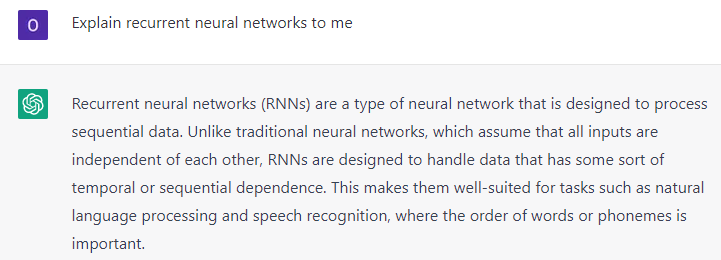

Writing code:

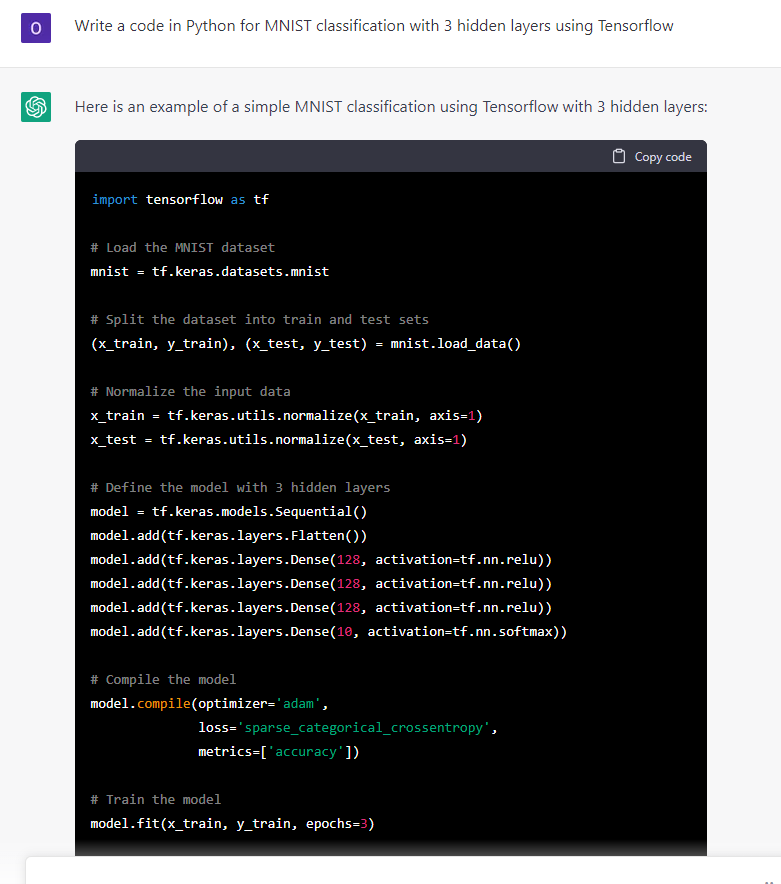

Still, it's not perfect...

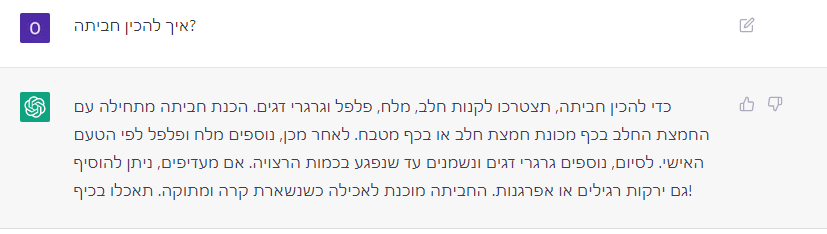